For full dataframe, check https://opendata.apur.org/datasets/Apur::recensement-commune-population/api

For colour scheme: https://coolors.co/4c6663-9999c3-869b40-cf1248-e89a24-9d6e54-ebf0f2

In [1]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import matplotlib.colors as mcolors
import numpy as np
plt.style.use('ggplot')
plt.rcParams["font.family"] = "sans-serif"

In [2]:
#define color map
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

hex_list = ['#Fac7d5','#cf1248','#710a27'] #change color code here



# Population density (communal level)

In [39]:
url = 'https://carto2.apur.org/apur/rest/services/OPENDATA/RECENSEMENT_COMMUNE/MapServer/4/query?where=1%3D1&outFields=nb_densite,pct_etranger,nb_immigre_n5,pct_immigre&outSR=4326&f=json'
df = gpd.read_file(url)

In [40]:
df.head()

nb_densite  pct_etranger  nb_immigre_n5  pct_immigre  \
0   12.112378     12.263990    1151.005067    16.405105   
1   27.137500     12.358849    1720.908771    17.059771   
2   27.005141     13.478566    2208.912509    21.234485   
3  166.752809      9.901621    3736.778419    13.847905   
4  128.139842     10.864188    6487.468628    15.832948   

                                            geometry  
0  POLYGON ((2.36963 48.74031, 2.36968 48.73948, ...  
1  POLYGON ((2.34849 48.71577, 2.34860 48.71575, ...  
2  POLYGON ((2.41849 48.95784, 2.41849 48.95765, ...  
3  POLYGON ((2.25786 48.91289, 2.25767 48.91088, ...  
4  POLYGON ((2.23268 48.87650, 2.23193 48.87586, ...

In [41]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   nb_densite     150 non-null    float64 
 1   pct_etranger   143 non-null    float64 
 2   nb_immigre_n5  143 non-null    float64 
 3   pct_immigre    143 non-null    float64 
 4   geometry       152 non-null    geometry
dtypes: float64(4), geometry(1)
memory usage: 6.1 KB


In [42]:
df.to_crs('EPSG:3857', inplace = True)

No handles with labels found to put in legend.


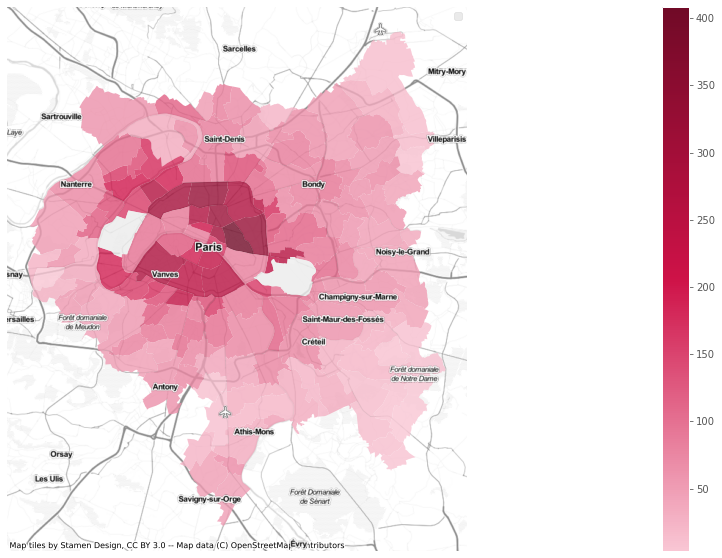

In [43]:
# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(70,10 ))

#plot df 
df.plot(column = 'nb_densite', ax =ax, alpha = 0.8 ,cmap = get_continuous_cmap(hex_list),legend = True,
       missing_kwds={"color": "#eeeeee","label": "public park"}
       )


#Final touches
ax.set_axis_off()
ax.legend()

#basemap
cx.add_basemap(ax, crs = df.crs, source = cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)


plt.show()
fig.savefig('/Users/Tra_FIT/Desktop/python/URBS1003/communal_pop_dn.png',dpi = 300,transparent = True)

No handles with labels found to put in legend.


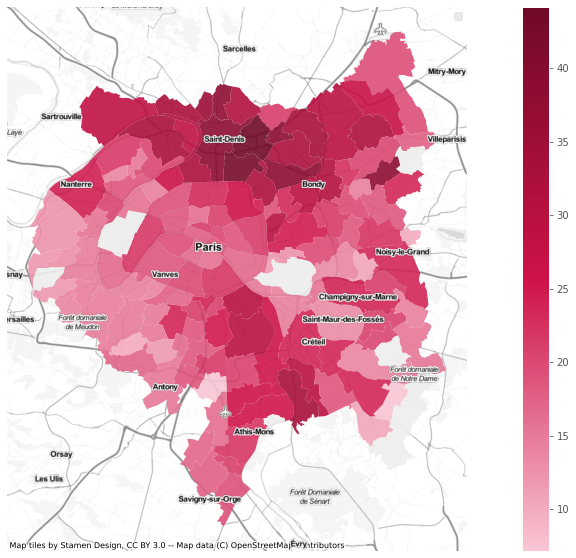

In [8]:
# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(20,10 ))

#plot df 
df.plot(column = 'pct_immigre', ax =ax, alpha = 0.9 ,cmap = get_continuous_cmap(hex_list),legend = True,
       missing_kwds={"color": "#eeeeee","label": "public park"}
       )


#Final touches
ax.set_axis_off()
ax.legend()

#basemap
cx.add_basemap(ax, crs = df.crs, source = cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)

plt.show()
fig.savefig('/Users/Tra_FIT/Desktop/python/URBS1003/communal_imm_dn.png',dpi = 300,transparent = True)

In [44]:
df.head()

nb_densite  pct_etranger  nb_immigre_n5  pct_immigre  \
0   12.112378     12.263990    1151.005067    16.405105   
1   27.137500     12.358849    1720.908771    17.059771   
2   27.005141     13.478566    2208.912509    21.234485   
3  166.752809      9.901621    3736.778419    13.847905   
4  128.139842     10.864188    6487.468628    15.832948   

                                            geometry  
0  POLYGON ((263786.171 6230912.349, 263791.133 6...  
1  POLYGON ((261432.599 6226771.229, 261445.042 6...  
2  POLYGON ((269225.056 6267710.671, 269225.111 6...  
3  POLYGON ((251344.088 6260093.809, 251323.076 6...  
4  POLYGON ((248540.684 6253931.770, 248456.784 6...

# Import Iris Level data

In [3]:
#import all IRIS Data
url_1 = "https://carto2.apur.org/apur/rest/services/OPENDATA/RECENSEMENT_IRIS/MapServer/0/query?where=1%3D1&outFields=l_ir,n_sq_ir,nb_densite,nb_etranger,pct_etranger,nb_immigre,pct_immigre&objectIds=1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,&outSR=4326&f=json"
df_1 = gpd.read_file(url_1)
df_1.fillna(0,inplace = True)
df_1.info()

url_2 = "https://carto2.apur.org/apur/rest/services/OPENDATA/RECENSEMENT_IRIS/MapServer/0/query?where=1%3D1&outFields=l_ir,n_sq_ir,nb_densite,nb_etranger,pct_etranger,nb_immigre,pct_immigre&objectIds=1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999&outSR=4326&f=json"
df_2 = gpd.read_file(url_2)
df_2.fillna(0,inplace = True)
df_2.info()

url_3 = "https://carto2.apur.org/apur/rest/services/OPENDATA/RECENSEMENT_IRIS/MapServer/0/query?where=1%3D1&outFields=l_ir,n_sq_ir,nb_densite,nb_etranger,pct_etranger,nb_immigre,pct_immigre&objectIds=2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224,2225,2226,2227,2228,2229,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304,2305,2306,2307,2308,2309,2310,2311,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950,2951,2952,2953,2954,2955,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999&outSR=4326&f=json"
df_3 = gpd.read_file(url_3)
df_3.fillna(0,inplace = True)
df_3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   l_ir          999 non-null    object  
 1   n_sq_ir       999 non-null    int64   
 2   nb_densite    999 non-null    float64 
 3   nb_etranger   999 non-null    float64 
 4   pct_etranger  999 non-null    float64 
 5   nb_immigre    999 non-null    float64 
 6   pct_immigre   999 non-null    float64 
 7   geometry      999 non-null    geometry
dtypes: float64(5), geometry(1), int64(1), object(1)
memory usage: 62.6+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   l_ir          1000 non-null   object  
 1   n_sq_ir       1000 non-null   int64   
 2   nb_densite    1000 non-null   float64 
 3   nb_etranger   1000 non-null   floa

In [4]:
agg = df_1.append(df_2).append(df_3)
agg.to_crs("EPSG:3857",inplace = True)

# MGP population density (iris level)

In [16]:
agg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2841 entries, 0 to 841
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   l_ir          2841 non-null   object  
 1   n_sq_ir       2841 non-null   int64   
 2   nb_densite    2841 non-null   float64 
 3   nb_etranger   2841 non-null   float64 
 4   pct_etranger  2841 non-null   float64 
 5   nb_immigre    2841 non-null   float64 
 6   pct_immigre   2841 non-null   float64 
 7   geometry      2841 non-null   geometry
dtypes: float64(5), geometry(1), int64(1), object(1)
memory usage: 199.8+ KB


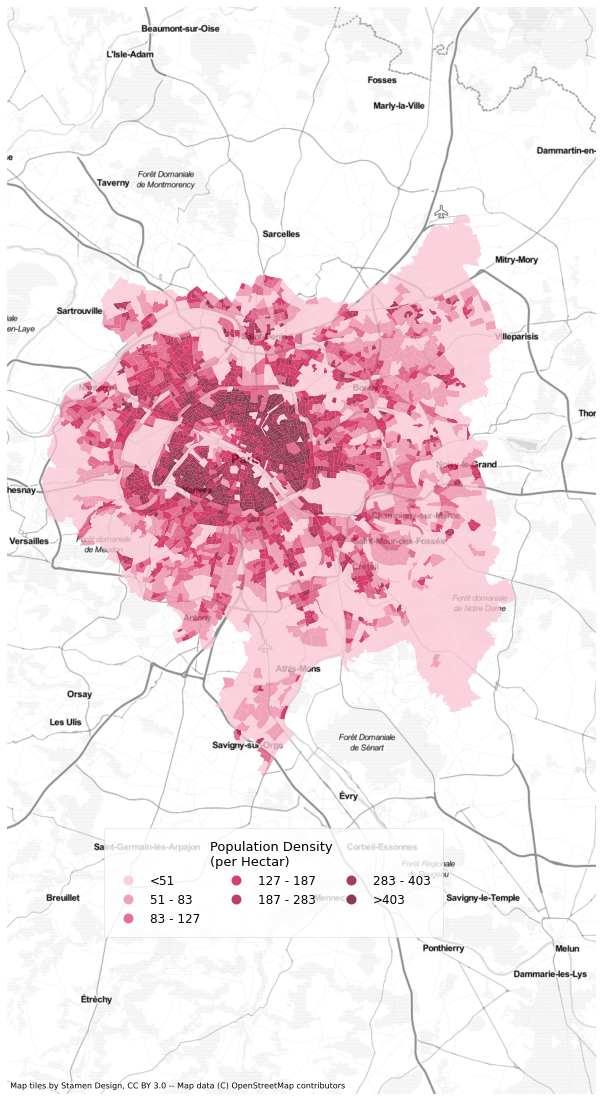

In [17]:
# template to plot the great paris map overlay
plt.rcParams['legend.title_fontsize'] = 13

fig, ax = plt.subplots(figsize=(80,20 ))

#basemap



#plot df 
agg.plot(column = 'nb_densite', ax =ax, alpha = 0.8 ,
         cmap = get_continuous_cmap(hex_list),
         scheme = "Quantiles",k = 7,
         legend =True, 
         legend_kwds={'fontsize':12,'bbox_to_anchor' :(0.75,0.25),
                                    'borderpad':1,'labelspacing':0.5,
                                   'labels':['<51','51 - 83','83 - 127','127 - 187','187 - 283','283 - 403','>403'],
                                    'title':'Population Density \n(per Hectar)','ncol': 3,
                      'facecolor':'#FFFFFF'})

ax.set_xlim(235000.460323,300000)
ax.set_ylim(6180000, 6300000)

cx.add_basemap(ax, crs = agg.crs, source = cx.providers.Stamen.TonerLite)



#Final touches
ax.set_axis_off()



plt.show()
fig.savefig('/Users/Tra_FIT/Desktop/python/URBS1003/iris_pop_dn.png',dpi = 300,transparent = True, bbox_inches='tight')

# MGP migrant population



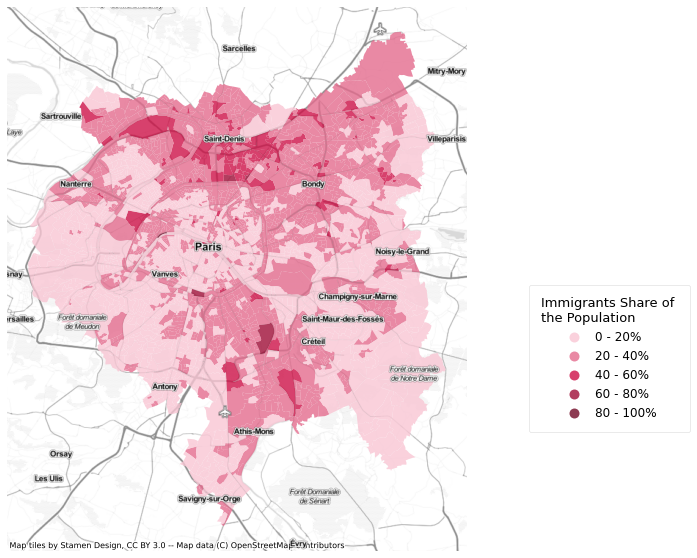

In [13]:
# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(20,10 ))

#plot df 
agg.plot(column = 'pct_immigre', ax =ax, alpha = 0.8 ,
         scheme = 'equal_interval',k=5,
         cmap = get_continuous_cmap(hex_list),legend = True,
        legend_kwds={'fontsize':12,'bbox_to_anchor' :(1.5,0.5),
                                    'borderpad':1,'labelspacing':0.5,
                                   'labels':['0 - 20%','20 - 40%','40 - 60%','60 - 80%','80 - 100%'],
                                    'title':'Immigrants Share of \nthe Population','facecolor':'#FFFFFF'})

#Final touches
ax.set_axis_off()


#basemap
cx.add_basemap(ax, crs = df.crs, source = cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs = df.crs, source = cx.providers.Stamen.TonerLabels)


plt.show()
fig.savefig('/Users/Tra_FIT/Desktop/python/URBS1003/iris_imm_dn.png',dpi = 300,transparent = True)

# La defense

In [5]:
defense = agg.iloc[[2581,1452,1597,2567],]
defense

l_ir    n_sq_ir  nb_densite  nb_etranger  pct_etranger  \
582  Défense Nord  920000485   42.762827   350.629799     15.862545   
453   Defense Sud  920002577   94.017855   323.715068     16.568931   
598      Regnault  920002606  157.240468   253.866915     14.976280   
568       Diderot  920002611  124.257106   386.614207     12.216913   

     nb_immigre  pct_immigre  \
582  596.668496    26.993373   
453  555.976879    28.456948   
598  460.041607    27.139070   
568  741.705807    23.437720   

                                              geometry  
582  POLYGON ((249096.943 6257000.732, 249120.742 6...  
453  POLYGON ((250299.429 6255974.478, 250574.410 6...  
598  POLYGON ((249567.629 6256328.079, 249567.393 6...  
568  POLYGON ((250665.629 6256398.068, 250643.447 6...

In [6]:
c_o_paris = "https://opendata.arcgis.com/datasets/7104e166a3af481d866d47beb96c0e36_0.geojson"

c_paris = gpd.read_file(c_o_paris)
c_paris.fillna(0,inplace = True)
c_paris.to_crs("EPSG:3857",inplace = True)
c_paris.info()



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      20 non-null     int64   
 1   N_SQ_AR       20 non-null     int64   
 2   C_AR          20 non-null     int64   
 3   C_ARINSEE     20 non-null     int64   
 4   L_AR          20 non-null     object  
 5   L_AROFF       20 non-null     object  
 6   N_SQ_CO       20 non-null     int64   
 7   NB_POP99      20 non-null     int64   
 8   NB_POP08      20 non-null     int64   
 9   NB_POP10      20 non-null     int64   
 10  POU_E99_10    20 non-null     float64 
 11  SHAPE_Length  20 non-null     float64 
 12  SHAPE_Area    20 non-null     float64 
 13  geometry      20 non-null     geometry
dtypes: float64(3), geometry(1), int64(8), object(2)
memory usage: 2.3+ KB


In [7]:
c_paris.loc[0]

OBJECTID                                                        1
N_SQ_AR                                                 750000019
C_AR                                                           19
C_ARINSEE                                                   75119
L_AR                                                        19ème
L_AROFF                                           Buttes-Chaumont
N_SQ_CO                                                 750001537
NB_POP99                                                   172587
NB_POP08                                                   184909
NB_POP10                                                   186652
POU_E99_10                                                8.14951
SHAPE_Length                                              11252.9
SHAPE_Area                                            6.79265e+06
geometry        POLYGON ((265989.9857414418 6258116.766444739,...
Name: 0, dtype: object

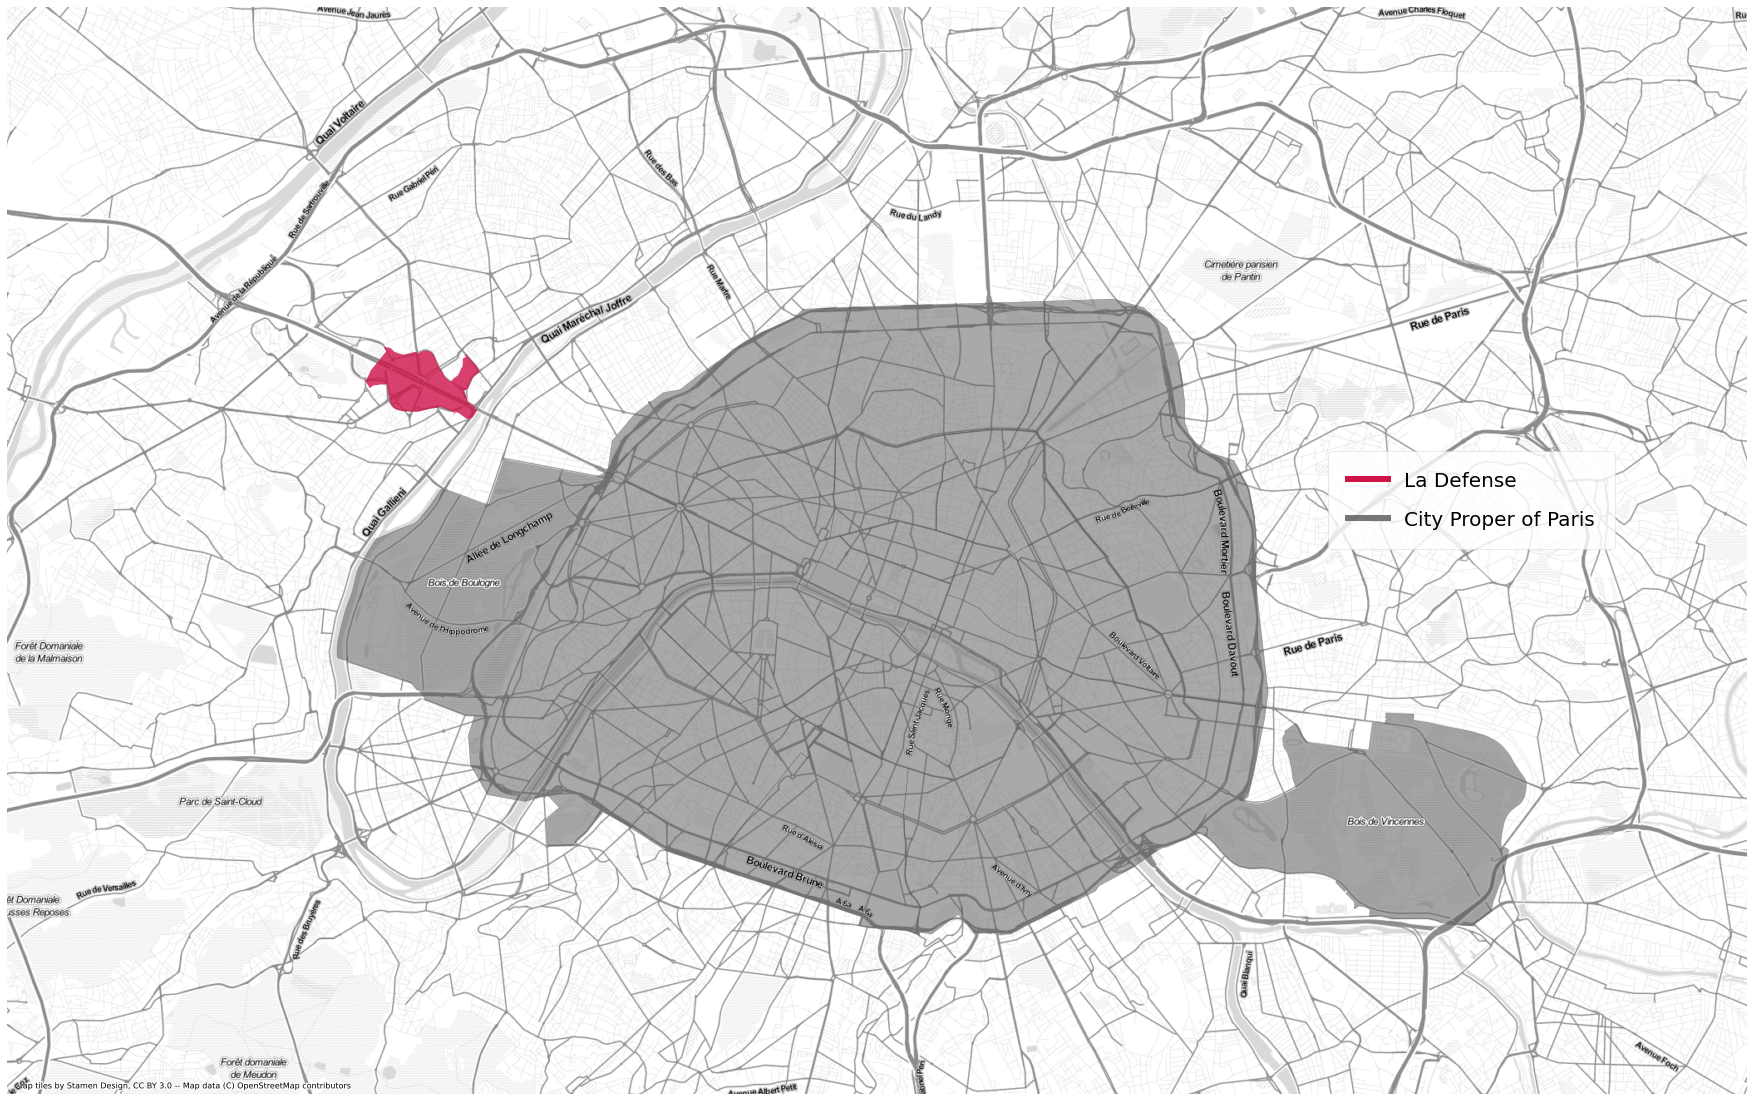

In [27]:
# template to plot the great paris map overlay
plt.rcParams['legend.title_fontsize'] = 13

fig, ax = plt.subplots(figsize=(80,20 ))

#basemap



#plot df 
defense.plot(ax = ax, color = '#cf1248',alpha = 0.8)
c_paris.plot(ax = ax, color = "#555555",edgecolor = "#555555", alpha = 0.5)

ax.set_xlim(240000,280000)
ax.set_ylim(6240000, 6265000)

cx.add_basemap(ax, crs = agg.crs, source = cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs = agg.crs, source = cx.providers.Stamen.TonerLabels)



#Final touches
ax.set_axis_off()

#legend
from matplotlib.lines import Line2D
colors = ['#cf1248','#555555CC']
lines = [Line2D([0], [0], color=c, linewidth=6, linestyle='-') for c in colors] #defining the handles
labels = ['La Defense','City Proper of Paris' ] #define the labels
plt.legend(lines,labels,prop={'size': 20}, 
           #customise the legend box
           frameon=True, facecolor= '#FFFFFF',
           bbox_to_anchor=(0.93, 0.6),
           borderpad = 1,
           labelspacing = 1,
           mode = None)

plt.show()
fig.savefig('/Users/Tra_FIT/Desktop/python/URBS1003/la_defense.png',dpi = 300,transparent = True, bbox_inches='tight')




In [ ]:
#legend
from matplotlib.lines import Line2D
colors = ['#cf1248','#555555']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors] #defining the handles
labels = ['La Defense','City Proper of Paris' ] #define the labels
plt.legend(lines,labels,prop={'size': 8}, 
           #customise the legend box
           frameon=True, facecolor= '#FFFFFF',
           borderpad = 1,
           labelspacing = 1,
           mode = None)